In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle


In [2]:
# ---------------------------
# Data Generation and Preprocessing
# ---------------------------
def generate_data(num_samples=1000, random_state=42, use_fixed_seed=True):
    """
      Set Parameters:
      num_samples (int): Number of samples to generate.
      random_state (int): Seed for reproducibility.
      use_fixed_seed (bool): Set to False to allow variability in outputs.
    """

    # Generate synthetic sensor readings
    moisture = np.random.uniform(0, 1, num_samples)
    nutrient = np.random.uniform(0, 1, num_samples)
    temperature = np.random.uniform(20, 40, num_samples)
    humidity = np.random.uniform(20, 100, num_samples)
    pest_indicator = np.random.uniform(0, 1, num_samples)

    # Create risk labels based on simple, rule-based logic
    labels = []
    for i in range(num_samples):
        risk = 0  # default: normal
        # Check drought condition
        if moisture[i] < 0.3 and temperature[i] > 35:
            risk = 1
        # Check pest condition
        if pest_indicator[i] > 0.7:
            # If drought condition already flagged, combine into both risks
            if risk == 1:
                risk = 3
            else:
                risk = 2
        labels.append(risk)

    data = pd.DataFrame({
        'moisture': moisture,
        'nutrient': nutrient,
        'temperature': temperature,
        'humidity': humidity,
        'pest': pest_indicator,
        'risk': labels
    })
    return data

print(generate_data())

     moisture  nutrient  temperature   humidity      pest  risk
0    0.760341  0.984169    20.344382  89.625401  0.534944     0
1    0.600787  0.579798    31.588029  56.659682  0.355419     0
2    0.681997  0.598258    28.380697  75.370531  0.402882     0
3    0.636607  0.557196    37.307264  81.920905  0.273314     0
4    0.907253  0.539237    39.300642  83.624778  0.976229     2
..        ...       ...          ...        ...       ...   ...
995  0.951987  0.532571    27.686344  68.328316  0.664687     0
996  0.002518  0.914162    30.892053  36.961818  0.393327     0
997  0.648535  0.676349    38.041794  62.735016  0.891026     2
998  0.691031  0.908888    32.174407  61.136567  0.946052     2
999  0.738279  0.924208    30.321619  35.945490  0.221444     0

[1000 rows x 6 columns]


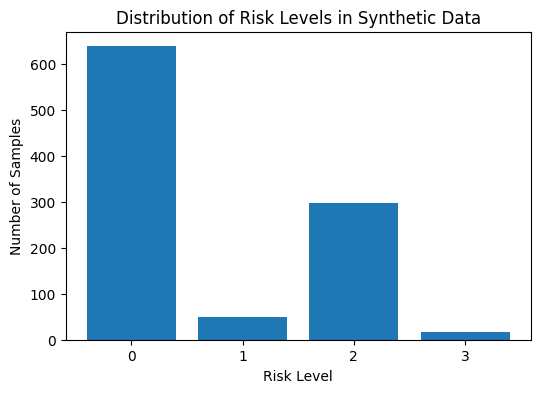

In [3]:
# Visualization function to plot the risk distribution
def plot_risk_distribution(data):
    risk_counts = data['risk'].value_counts().sort_index()
    plt.figure(figsize=(6, 4))
    plt.bar(risk_counts.index.astype(str), risk_counts.values)
    plt.xlabel("Risk Level")
    plt.ylabel("Number of Samples")
    plt.title("Distribution of Risk Levels in Synthetic Data")
    plt.show()

plot_risk_distribution(generate_data())


In [4]:
# ---------------------------
# Model Training and Evaluation (We are using Decision Tree Classifier)
# ---------------------------
def train_model(data):
    # Extract features and target
    features = data[['moisture', 'nutrient', 'temperature', 'humidity', 'pest']]
    labels = data['risk']

    # Print dataset observations
    print("Data Description:")
    print(data.describe(), "\n")
    print("Risk Distribution:")
    print(data['risk'].value_counts().sort_index(), "\n")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model on test data
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Model Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Display confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", conf_matrix, "\n")

    return model  #returned trained classifier


In [5]:
# ---------------------------
# Sensor Simulation and SMS Alert
# ---------------------------
def simulate_sensor_reading():
    """
    Returns:
      sensor_data (np.array): A 1x5 array representing the sensor values.
    """
    moisture = np.random.uniform(0, 1)
    nutrient = np.random.uniform(0, 1)
    temperature = np.random.uniform(20, 40)
    humidity = np.random.uniform(20, 100)
    pest_indicator = np.random.uniform(0, 1)

    sensor_data = np.array([moisture, nutrient, temperature, humidity, pest_indicator]).reshape(1, -1)
    print("Simulated Sensor Reading:", sensor_data)
    return sensor_data

def send_sms_alert(risk):
    if risk == 0:
        message = "No risk detected. Your crops are in good condition."
    elif risk == 1:
        message = "Drought risk detected. Consider irrigation."
    elif risk == 2:
        message = "Pest risk detected. Consider pest control measures."
    elif risk == 3:
        message = "Both drought and pest risks detected. Urgent action needed: irrigate and apply pest control."
    print("SMS Alert:", message)
    return message


In [6]:
# ---------------------------
# Main Function
# ---------------------------
def main():
    print("1: Generating synthetic sensor data...")
    data = generate_data(num_samples=1000, use_fixed_seed=True)
    print("First 5 rows of generated data:")
    print(data.head(), "\n")

    # Distribution of risk classes
    print("Observations from generated data:")
    print("Risk Level Counts:")
    print(data['risk'].value_counts().sort_index(), "\n")


    print("\n\n\n2: Training the model...")
    model = train_model(data)
    print("Model training completed.\n")

    # Save model locally for offline use
    with open("env_monitoring_model.pkl", "wb") as f:
        pickle.dump(model, f)
    print("Model saved to 'env_monitoring_model.pkl'\n")

    print("\n\n\n3: Simulating real-time sensor reading and prediction...")
    sensor_data = simulate_sensor_reading()
    risk_pred = model.predict(sensor_data)[0]
    print("\n\nPredicted risk level:", risk_pred)
    send_sms_alert(risk_pred)

if __name__ == "__main__":
    main()


1: Generating synthetic sensor data...
First 5 rows of generated data:
   moisture  nutrient  temperature   humidity      pest  risk
0  0.591275  0.418870    22.492808  66.274111  0.345500     0
1  0.868347  0.759297    31.119286  96.227331  0.352517     0
2  0.832637  0.726713    32.997119  52.425513  0.733197     2
3  0.972585  0.939944    39.461296  43.132871  0.762873     2
4  0.623130  0.617560    31.598123  40.101094  0.648453     0 

Observations from generated data:
Risk Level Counts:
risk
0    630
1     56
2    289
3     25
Name: count, dtype: int64 




2: Training the model...
Data Description:
          moisture     nutrient  temperature     humidity         pest  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.485531     0.500150    30.193583    58.610630     0.510373   
std       0.284027     0.289042     5.882584    23.326018     0.288688   
min       0.000755     0.001384    20.013633    20.054585     0.000290   
25%       0.23999

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
